In [4]:
import cvrpy
import numpy as np
import tikzplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

# Analysis of Mallows model palorization

In [5]:
n_voters = 1000
n_candidates = 10

In [6]:


def get_metrics(n_centers, phi):
    a = cvrpy.MallowsGenerator(n_centers, phi)
    n_voters = 1000
    m_candidates = 10
    rankings = np.array((a(n_voters,m_candidates)))

    metrics = []
    for i in range(m_candidates):
        for j in range(i+1,m_candidates):
            alpha = cvrpy.getAlpha(rankings, i, j)
            beta = cvrpy.getBeta(rankings, i, j)
            gamma = cvrpy.getGamma(rankings, i, j)
            imbalance = 1-cvrpy.getImbalance(rankings, i, j)
            metrics.append([alpha, beta, gamma, imbalance])

    metrics = np.array(metrics)
    return metrics
    

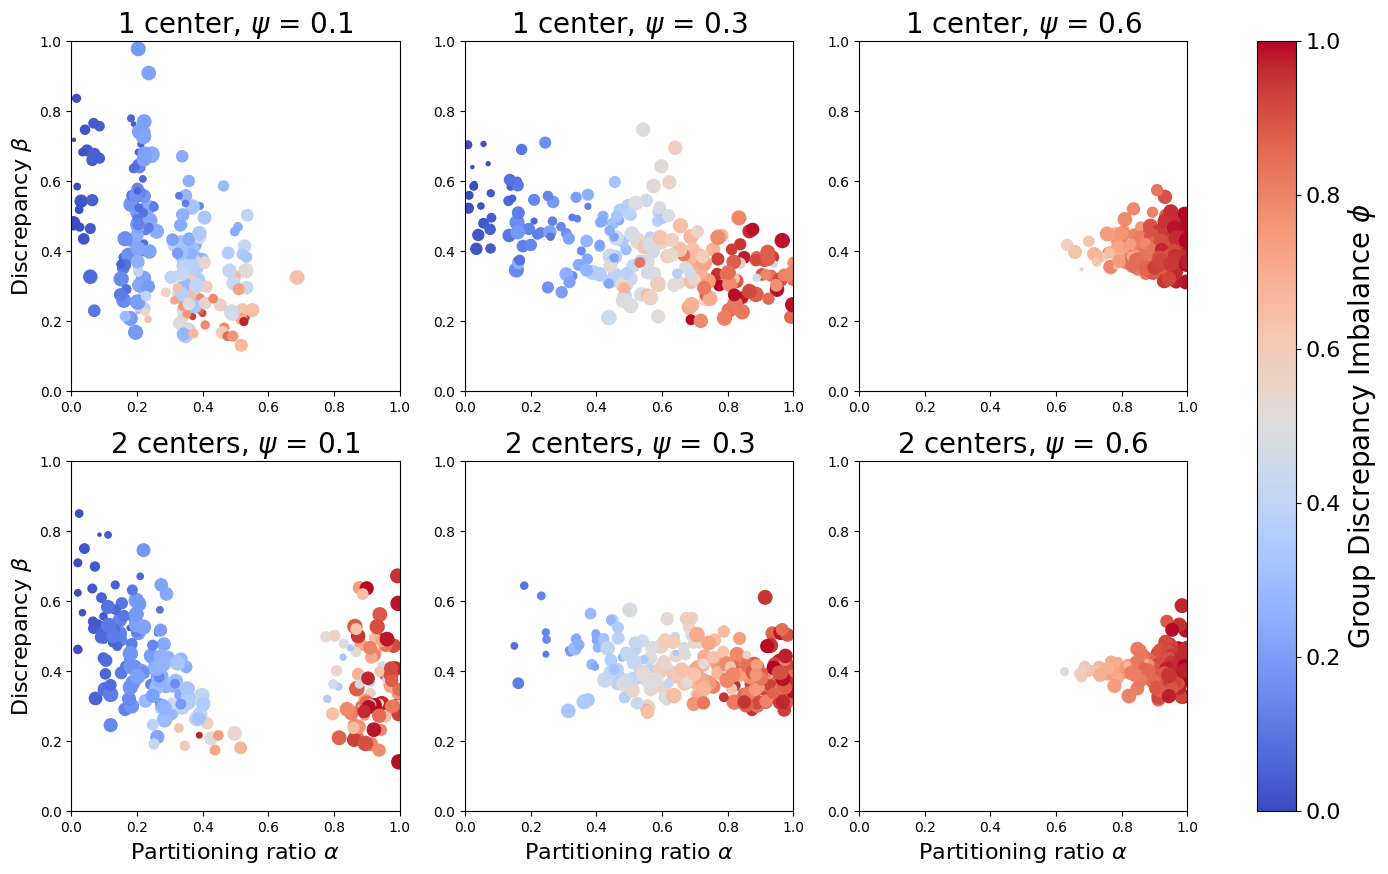

In [7]:
phi_list = [0.1,0.3,0.6]
n_centers_list = [1,2]

np.random.seed(42)
fig, axs = plt.subplots(2, 3, figsize=(18,10))

n_profile = 5
for i, n_centers in enumerate(n_centers_list):
    for j, phi in enumerate(phi_list):
        metrics = np.concatenate([get_metrics(n_centers, phi) for _ in range(n_profile)])
        cs = axs[i,j].scatter(metrics[:,0], metrics[:,1], c=metrics[:,3], vmin=0, vmax=1,
            s=(metrics[:,2]-min(metrics[:,2]))/(max(metrics[:,2])-min(metrics[:,2]))*100+5, cmap='coolwarm')
        if n_centers == 1:
            axs[i,j].set_title(r"{} center, $\psi$ = {}".format(n_centers, phi), fontsize=20)
        else:
            axs[i,j].set_title(r"{} centers, $\psi$ = {}".format(n_centers, phi), fontsize=20)
        if i == 1:
            axs[i,j].set_xlabel(r"Partitioning ratio $\alpha$", fontsize=16)
        if j == 0:
            axs[i,j].set_ylabel(r"Discrepancy $\beta$", fontsize=16)
        axs[i,j].set_xlim(0,1)
        axs[i,j].set_ylim(0,1)
        

cbar = plt.colorbar(cs, ax=axs.ravel().tolist())
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label=r"Group Discrepancy Imbalance $\phi$", size=20)
# tikzplotlib.save("figures/mallows.tex")
plt.savefig("figures/mallows.png", dpi=300)
plt.show()

In [10]:
phi_list = [0.1*i for i in range(11)]
n_centers_list = [1,2]

np.random.seed(42)

n_profile = 50


colors = ["#4f38d6", "#e31f14", "#bae022","#4be022"]
plt.figure(figsize=(8,6))
for i, n_centers in enumerate(n_centers_list):
    
    metrics = np.zeros((4,11))
    for j, phi in tqdm(enumerate(phi_list)):
        for _ in range(n_profile):
            all_metrics = get_metrics(n_centers, phi)
            metrics[0,j] += np.mean(all_metrics[:,0])
            metrics[1,j] += np.max(all_metrics[:,1])
            metrics[2,j] += np.mean(all_metrics[:,2])
            metrics[3,j] += np.mean(all_metrics[:,3])
    metrics /= n_profile

    if i == 0:
        dots = "o-"
        plt.plot(phi_list, metrics[0,:], dots, label="mean alpha", color=colors[0])
        plt.plot(phi_list, metrics[1,:], dots, label="max beta", color=colors[1])
        plt.plot(phi_list, metrics[2,:], dots,label="mean gamma", color=colors[2])
        plt.plot(phi_list, metrics[3,:],dots, label="mean imbalance", color=colors[3])
    else:
        dots = "o--"
        plt.plot(phi_list, metrics[0,:], dots,  color=colors[0])
        plt.plot(phi_list, metrics[1,:], dots,  color=colors[1])
        plt.plot(phi_list, metrics[2,:], dots, color=colors[2])
        plt.plot(phi_list, metrics[3,:],dots,  color=colors[3])

plt.xlabel("phi")
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel("metrics values")
plt.legend()
tikzplotlib.save("figures/mallows_phi.tex")
# plt.show()


()